Practice 2 – kmeans

In [58]:
import numpy as np
from sklearn.cluster import KMeans
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()



1) DATA VISUALIZATION
a) Load the database (Customers_practice.csv). 

In [62]:
Customers_practice = pd.read_csv("C:/Users/User/Downloads/Customers_practice.csv")

b) Print the 10 first rows (with head function) of the dataset. Determine the size of the 
examples and the number of features of the problem.

In [60]:
Customers_practice.head(n = 10)

,Annual_Income_(k$),Spending_Score
0,103,85
1,60,52
2,59,55
3,62,55
4,48,47
5,44,50
6,73,5
7,33,92
8,71,75
9,21,66


In [61]:
Customers_practice.shape

(170, 2)

We can find the size of the examples is 170 and the number of features is 2.

c) Display a scatter plot of the data. You should obtain the following expected result : 

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

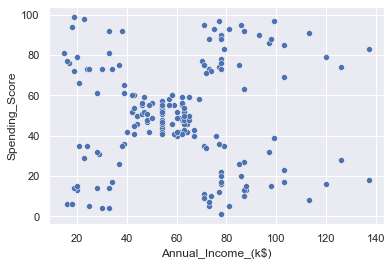

In [56]:
sns.scatterplot(x = Customers_practice["Annual_Income_(k$)"], y = Customers_practice["Spending_Score"])

2) K-MEANS ALGORITHM 

a) Test the kmeans algorithm with k=3, with random_state=0. Use the fit() function on 
your dataset. Because there is no target column, you can use all of the Data to train 
your model.

In [57]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(Customers_practice)

print(kmeans.predict([[0, 0], [12, 3]]))

print(kmeans.cluster_centers_)

[1 1]
[[87.54545455 19.24242424]
 [44.35576923 49.63461538]
 [86.84848485 82.63636364]]


b) Once the model is trained, you can access to the labels assigned to Data by kmeans 
using labels_ attribute (look for the documentation to see an example of usage).
Display the distinct classes assigned by kmeans (use np.unique())

In [21]:
print("labels = {}".format(kmeans.labels_))

labels = [2 1 1 1 1 1 0 1 2 1 1 1 2 1 2 1 1 0 1 1 1 2 0 2 1 1 1 2 2 1 1 1 1 1 2 1 1
 1 2 0 1 0 1 1 1 2 0 1 1 1 1 2 1 1 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 1 0 1 0 2 2 1 0 0 1 1
 2 2 1 2 0 2 1 1 1 1 1 0 1 2 1 2 1 2 1 1 0 1 2 1 0 1 1 2 1 0 1 1 0 0 0 1 0
 0 1 0 2 2 0 1 1 1 1 2 1 1 2 2 1 1 1 2 1 0 1]


c) You can access to the centroids of the clusters using the cluster_centers_ attribute 
(look for the documentation to see an example of usage). Print them. 

In [22]:
print("cluster_centers = {}".format(kmeans.cluster_centers_))

cluster_centers = [[87.54545455 19.24242424]
 [44.35576923 49.63461538]
 [86.84848485 82.63636364]]


d) Plot the scatter plot using the labels assigned by kmeans algorithm. This time plot the 
points according to the label. You should obtain the following plot :

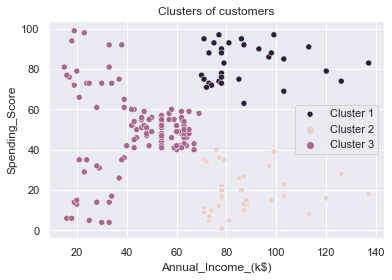

In [23]:
legend_clusters = ["Cluster 1","Cluster 2","Cluster 3"]
fig, ax = plt.subplots()

sns.scatterplot(x = Customers_practice["Annual_Income_(k$)"], y = Customers_practice["Spending_Score"], hue = kmeans.labels_)
plt.title("Clusters of customers")
plt.legend(legend_clusters)


e) Explain why k=3 seems not appropriate for the correct number of clusters.
 
Because some points that are far away from each other even though in the same cluster, it indecates that two persons that have great different spending score or annual incomme can be in the same cluster.

f) Find a way to plot the centroids on the plot. Be practical and create a function to plot 
everything.

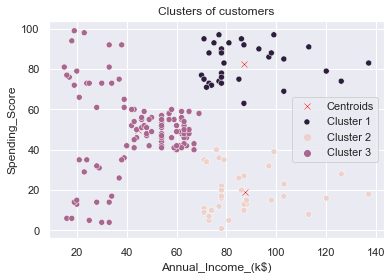

In [24]:
legend_clusters = ["Centroids","Cluster 1","Cluster 2","Cluster 3"]
fig, ax = plt.subplots()

sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], marker = "x", color = "red")
sns.scatterplot(x = Customers_practice["Annual_Income_(k$)"], y = Customers_practice["Spending_Score"], hue = kmeans.labels_)
plt.title("Clusters of customers")
plt.legend(legend_clusters)

3) FIND THE OPTIMAL VALUE OF K

a) Using the whole base, write a script for :
- Finding the optimal value of k using the elbow method (use the following range : [1,16[ ). 
MSc AIBT : Machine Learning with Python
3
- Use the following parameters in Kmeans initialization : random_state = 42 and init=’kmeans++’.
- Draw the elbow method plot (you should obtain the following plot Conclude on the best value of k

In [25]:
k_s = list(range(1,16))
ssds = []

for k in k_s:
    kmeans = KMeans(n_clusters = k, random_state = 42, init = "k-means++").fit(Customers_practice)
    ssds.append(kmeans.inertia_)


C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Elbow Plot')

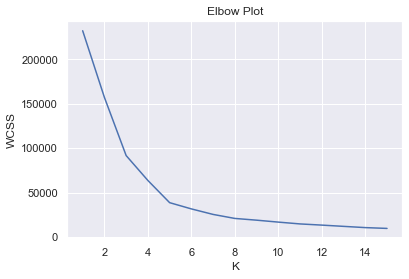

In [26]:
plt.plot(k_s, ssds)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Plot")

b) Train a k-means model with the best value of k obtained before :
- random_state=42 and init=’k-means++’
- Draw the scatterplot associated
- Observe and describe the obtained clusters according to the axis (e.g. cluster 1 contains the 
customers having low income but a high number of transactions)

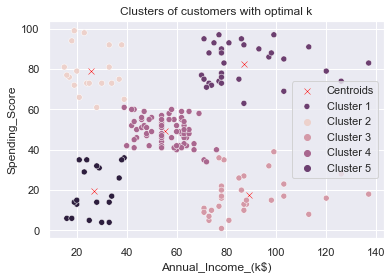

In [27]:
kmeans_opti = KMeans(n_clusters = 5, random_state = 42, init = "k-means++").fit(Customers_practice)

legend_clusters = ["Centroids","Cluster 1","Cluster 2","Cluster 3", "Cluster 4", "Cluster 5"]

sns.scatterplot(x = kmeans_opti.cluster_centers_[:,0], y = kmeans_opti.cluster_centers_[:,1], marker = "x", color = "red")
sns.scatterplot(x = Customers_practice["Annual_Income_(k$)"], y = Customers_practice["Spending_Score"], hue = kmeans_opti.labels_)
plt.title("Clusters of customers with optimal k")
plt.legend(legend_clusters)

Cluster 1: above average incomme and high spendings.
Cluster 2: average incommes and average spendings.
Cluster 3: above average incommes and low spendings.
Cluster 4: low incommes and low spendings.
Cluster 5: low incommes and high spendings.

4) MORE

a) Use your trained kmeans on optimal value of k (found in part 4) to predict the test 
samples just loaded.

In [50]:
Customers_practice_test = pd.read_csv("C:/Users/User/Downloads/Customers_practice.csv")

b) Print the predictions

In [51]:
test_predict = kmeans_opti.predict(Customers_practice_test)
print(test_predict)

[3 2 2 2 2 2 1 0 3 0 2 2 3 2 3 0 2 1 2 4 2 3 1 3 2 0 2 3 3 4 2 4 2 4 3 4 2
 2 3 1 2 1 2 4 4 3 1 2 2 2 2 3 2 2 4 2 1 2 4 1 0 2 1 2 2 1 1 0 2 1 1 2 4 2
 2 2 1 1 1 2 2 0 2 4 4 2 2 0 3 4 2 2 3 2 0 2 3 2 3 2 4 1 0 1 3 3 2 1 1 0 2
 3 3 2 3 1 3 2 0 4 2 0 2 2 3 2 3 2 3 2 4 2 4 3 2 1 2 2 3 4 1 2 0 2 1 1 2 1
 1 0 1 3 3 1 4 2 2 2 3 0 2 3 3 2 0 0 3 0 1 2]


c) Plot the decision boundaries (here is an example with k=3

In [48]:
from matplotlib.colors import ListedColormap
def plot_decision_boundaries(clf, X, y, x1=0, x2=1): # I copied what you sent
    '''
    Example of using it : plot_decision_boundaries(knn1, X_train, X_test, y_train, y_test, x1=0, x2=2)
    if clf is an own model, has to have predict function
    '''
    if not isinstance(X, pd.DataFrame):
        raise TypeError('X must be a dataframe')
    #try:
    classnames=np.unique(y)
    column_names = X.columns
    space = 0.02
    threshold = 0.1
    x_min,  x_max  =  X.iloc[:,  x1].min()-threshold,  X.iloc[:,  x1].max()+threshold
    y_min,  y_max  =  X.iloc[:,  x2].min()-threshold,  X.iloc[:,  x2].max()+threshold
    xx,  yy  =  np.meshgrid(np.arange(x_min,  x_max,  space), np.arange(y_min,  y_max,  space))
    Y  =  np.array(clf.predict(np.c_[xx.ravel(),  yy.ravel()]))
    Y  =  Y.reshape(xx.shape)


    colors_ = ('yellow','grey','blue','green','red','magenta','orange')
    colors_2 = ('#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#FF0000', '#E000FF' , '#FFA600')
    # Create the colormap
    cm = ListedColormap(colors_[0:1+len(np.unique(y))])
    cm2 = ListedColormap(colors_2[0:1+len(np.unique(y))])
    colors_3 = [colors_2[i] for i in range(len(np.unique(y))-1)]
    colors_3.append(colors_2[len(np.unique(y))])
    #cm3 = ListedColormap(colors_3)
    cm3 = ListedColormap(colors_2)
    print(colors_2)
    print(colors_3)
    contour = plt.contour(xx, yy, Y)
    plt.contourf(xx,  yy,  Y,  alpha=0.8, cmap=cm2)# cmap=plt.cm.RdYlBu)


    for i in np.unique(y):
        mask = y == i
        plt.scatter(X.iloc[:, x1][mask], X.iloc[:, x2][mask], c=cm3(i), label=list(classnames)[i], edgecolors='k', alpha=0.8)

    plt.xlabel('{}'.format(column_names[x1]))
    plt.ylabel('{}'.format(column_names[x2]))

    plt.legend()
    #plt.xlim(xx.min()-1,  xx.max()+1)
    #plt.ylim(yy.min()-1,  yy.max()+1)
    plt.xlim(xx.min()-threshold,  xx.max()+threshold)
    plt.ylim(yy.min()-threshold,  yy.max()+threshold)
    plt.show()

('#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#FF0000', '#E000FF', '#FFA600')
['#FFFB00', '#C7C7C7', '#00AEFF', '#2EFF00', '#E000FF']


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

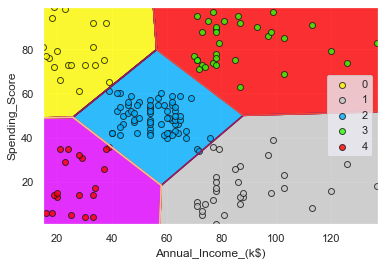

In [49]:
plot_decision_boundaries(kmeans_opti, Customers_practice, kmeans_opti.labels_, 0, 1)